## 데이터 생성

In [1]:
import numpy as np

In [2]:
real_X=np.random.uniform(size=100)

In [3]:
real_y=np.sin(2*np.pi*real_X)+0.15*np.random.normal(0.01, size=100)

In [4]:
import matplotlib.pyplot as plt

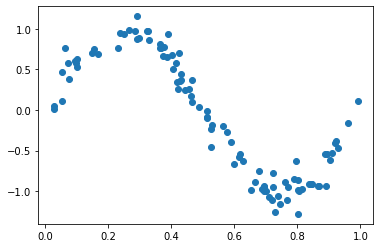

In [5]:
plt.scatter(real_X,real_y)

In [6]:
import pandas as pd
df=pd.DataFrame(np.column_stack((real_X,real_y)))
df.columns=['X','y']


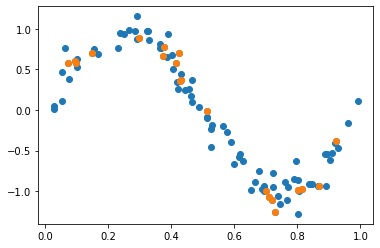

In [7]:
sample=df.sample(20)
plt.scatter(real_X,real_y)
plt.scatter(sample['X'], sample['y'])

In [8]:
sample=sample.sort_values(by=['X'])
X=sample['X']
y=sample['y']

In [9]:
X

94    0.074817
39    0.095891
92    0.100018
96    0.150229
22    0.298946
80    0.376058
35    0.376191
99    0.416314
70    0.425795
21    0.427719
55    0.431835
67    0.514661
84    0.701998
34    0.710535
56    0.718607
50    0.729506
26    0.803787
85    0.815227
36    0.868176
8     0.923319
Name: X, dtype: float64

## 1차회귀

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [11]:
X=np.array(X).reshape(-1,1)
reg.fit(X,y)

LinearRegression()

In [12]:
y_pred=reg.predict(X)

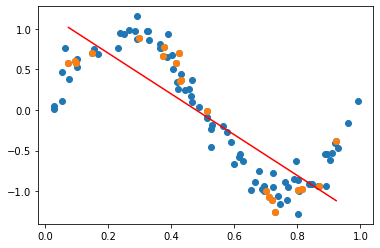

In [13]:
plt.scatter(real_X,real_y)
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
mean_squared_error(y,y_pred)

0.16857673733125259

## 2차항이 포함된 식으로 변경하기

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False)
X_2=poly.fit_transform(X)
X_2

array([[0.07481722, 0.00559762],
       [0.09589078, 0.00919504],
       [0.10001784, 0.01000357],
       [0.15022901, 0.02256876],
       [0.29894565, 0.0893685 ],
       [0.37605762, 0.14141933],
       [0.37619109, 0.14151974],
       [0.41631395, 0.1733173 ],
       [0.42579474, 0.18130116],
       [0.42771852, 0.18294313],
       [0.43183518, 0.18648162],
       [0.51466092, 0.26487587],
       [0.70199827, 0.49280157],
       [0.71053544, 0.50486061],
       [0.7186069 , 0.51639587],
       [0.72950637, 0.53217955],
       [0.80378731, 0.64607403],
       [0.81522713, 0.66459527],
       [0.868176  , 0.75372956],
       [0.92331941, 0.85251873]])

In [17]:
reg.fit(X_2,y)

LinearRegression()

In [18]:
y_pred=reg.predict(X_2)

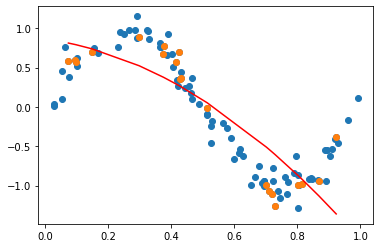

In [19]:
plt.scatter(real_X,real_y)
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

In [20]:
mean_squared_error(y,y_pred)

0.1520998945076579

## 3차식

In [21]:
poly = PolynomialFeatures(degree=3,include_bias=False)
X_temp=poly.fit_transform(X)
reg.fit(X_temp,y)
y_pred=reg.predict(X_temp)
mean_squared_error(y,y_pred)


0.01261848016947117

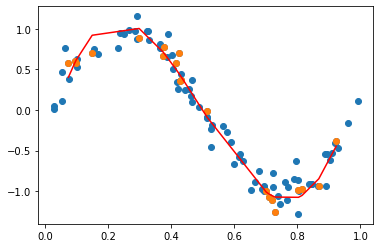

In [22]:
plt.scatter(real_X,real_y)
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

## 8차식

In [23]:
poly = PolynomialFeatures(degree=8,include_bias=False)
X_temp=poly.fit_transform(X)
reg.fit(X_temp,y)
y_pred=reg.predict(X_temp)
mean_squared_error(y,y_pred)


0.005870070609098771

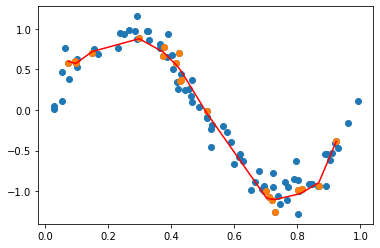

In [24]:
plt.scatter(real_X,real_y)
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

## 10차식

In [25]:
poly = PolynomialFeatures(degree=20,include_bias=False)
X_temp=poly.fit_transform(X)
reg.fit(X_temp,y)
y_pred=reg.predict(X_temp)
mean_squared_error(y,y_pred)

0.0026162386669351073

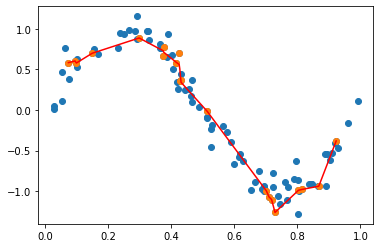

In [26]:
plt.scatter(real_X,real_y)
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

## 유연성이 좋은 모델이 반드시 좋은가?

In [83]:
true_mse = []
train_mse = []
for i in range(1,8):
    sample=df.sample(20)
    sample=sample.sort_values(by=['X'])
    X=sample['X']
    y=sample['y']
    X=np.array(X).reshape(-1,1)    
    poly = PolynomialFeatures(degree=i,include_bias=False)    
    X_temp = poly.fit_transform(X)
    reg.fit(X_temp,y)
    y_pred=reg.predict(X_temp)
    train_mse.append(mean_squared_error(y,y_pred))
    real_X_transformed =  poly.fit_transform(real_X.reshape(-1,1))
    true_mse.append(mean_squared_error(real_y,reg.predict(real_X_transformed)))

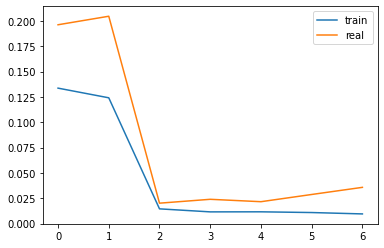

In [84]:
plt.plot(train_mse,label='train')
plt.plot(true_mse,label='real')
plt.legend()